In [12]:
# Imports
import astropy.constants as c
import astropy.units as u
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font',size=20)

In [13]:
# Parameters
outputDir='../../../output/cooling_old/'
#outputDir='../../../output/Hen15_betaprof_fixinfall/'
filePrefix='SA_output_'
filePostfix='.h5'
snap='58'
firstFile=40
lastFile=40
xmin=1e12
xmax=1e15
ymin0=1e9
ymax0=1e14
ymin1=0.
ymax1=0.2
baryonFrac=0.155 # Read from header!

In [14]:
# First determine the size of the arrays that we need to hold the data
nGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGal+=len(f[snap])
print('nGal=',nGal)

# Declare numpy arrays to hold the data
Type=np.empty(nGal)
Mvir=np.empty(nGal)
CentralMvir=np.empty(nGal)
ColdGas=np.empty(nGal)
HotGas=np.empty(nGal)
EjectedMass=np.empty(nGal)
ExcessMass=np.empty(nGal)
DiskMass=np.empty(nGal)
BulgeMass=np.empty(nGal)
BlackHoleMass=np.empty(nGal)
ICM=np.empty(nGal)
BaryonMass=np.empty(nGal)
TotalMass=np.empty(nGal)

# Now read in the data
iGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGalFile=len(f[snap])
        Type[iGal:iGal+nGalFile]=f[snap]['Type']
        CentralMvir[iGal:iGal+nGalFile]=f[snap]['CentralMvir']
        Mvir[iGal:iGal+nGalFile]=f[snap]['Mvir']
        ColdGas[iGal:iGal+nGalFile]=f[snap]['ColdGas']
        HotGas[iGal:iGal+nGalFile]=f[snap]['HotGas']
        EjectedMass[iGal:iGal+nGalFile]=f[snap]['EjectedMass']
        ExcessMass[iGal:iGal+nGalFile]=f[snap]['ExcessMass']
        DiskMass[iGal:iGal+nGalFile]=f[snap]['DiskMass']
        BulgeMass[iGal:iGal+nGalFile]=f[snap]['BulgeMass']
        BlackHoleMass[iGal:iGal+nGalFile]=f[snap]['BlackHoleMass']
        ICM[iGal:iGal+nGalFile]=f[snap]['ICM']
        iGal+=nGalFile
        
BaryonMass=ColdGas+HotGas+EjectedMass+DiskMass+BulgeMass+BlackHoleMass+ICM
TotalMass=BaryonMass+ExcessMass

nGal= 14629


In [15]:
# We want the total mass of all objects in the FoF group
# Satellite galaxies precede the Type 0 that they are part of, so we can do this simply with indexing of Type 0 galaxies.
index0=np.where(Type==0)[0]
# Completely failed to do this by clever indexing, so going to do it longhand
BaryonMassHalo=np.empty(len(index0))
BaryonMassHalo[0]=np.sum(BaryonMass[0:index0[0]+1])
for i in range(1,len(index0)): BaryonMassHalo[i]=np.sum(BaryonMass[index0[i-1]+1:index0[i]+1])
# Completely failed to do this by clever indexing, so going to do it longhand
TotalMassHalo=np.empty(len(index0))
TotalMassHalo[0]=np.sum(TotalMass[0:index0[0]+1])
for i in range(1,len(index0)): TotalMassHalo[i]=np.sum(TotalMass[index0[i-1]+1:index0[i]+1])

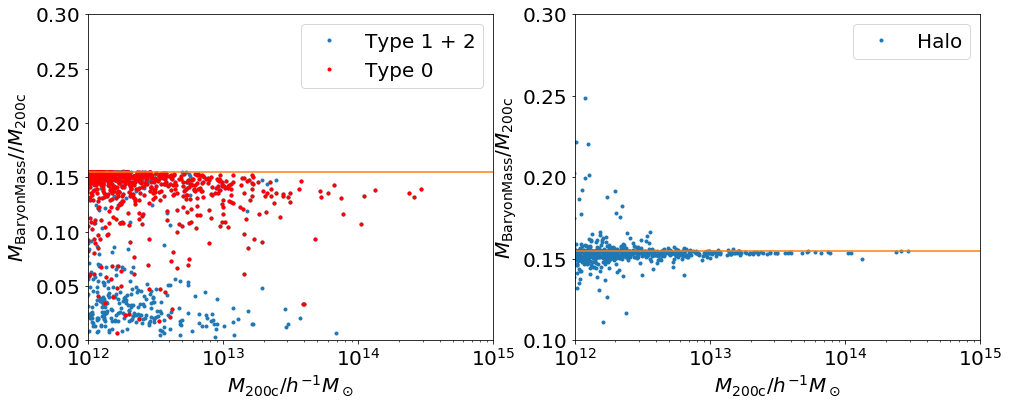

In [16]:
# Plots of baryon fractions
plt.figure(0,figsize=(16,6))
#plt.figure(0,figsize=(8,6))
plt.subplot(1,2,1)
plt.semilogx(Mvir*1e10,BaryonMass/Mvir,'.',label='Type 1 + 2')
plt.semilogx(Mvir[index0]*1e10,BaryonMass[index0]/Mvir[index0],'r.',label='Type 0')
plt.xlabel(r'$M_\mathrm{200c}/h^{-1}M_\odot$')
plt.ylabel(r'$M_\mathrm{BaryonMass}//M_\mathrm{200c}$')
plt.plot([xmin,xmax],[baryonFrac,baryonFrac])
plt.xlim([xmin,xmax])
plt.ylim([ymin1,ymax1+0.1])
plt.legend()
plt.subplot(1,2,2)
plt.semilogx(Mvir[index0]*1e10,BaryonMassHalo/Mvir[index0],'.',label='Halo')
plt.xlabel(r'$M_\mathrm{200c}/h^{-1}M_\odot$')
plt.ylabel(r'$M_\mathrm{BaryonMass}/M_\mathrm{200c}$')
plt.plot([xmin,xmax],[baryonFrac,baryonFrac])
plt.xlim([xmin,xmax])
plt.ylim([ymin1+0.1,ymax1+0.1])
plt.legend()
plt.savefig('figs/Baryons_'+outputDir.split('/')[-2]+'.png')

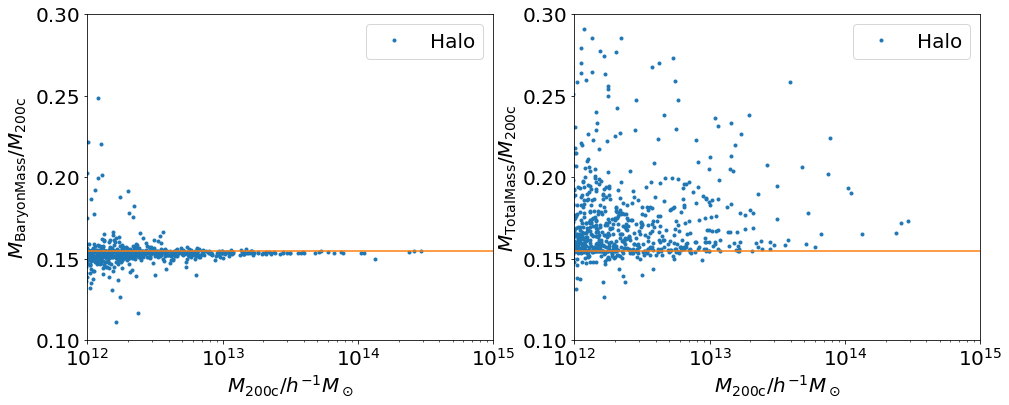

In [17]:
# Plots of baryon fractions with and without the ExcessMass phase
plt.figure(0,figsize=(16,6))
#plt.figure(0,figsize=(8,6))
plt.subplot(1,2,1)
plt.semilogx(Mvir[index0]*1e10,BaryonMassHalo/Mvir[index0],'.',label='Halo')
plt.xlabel(r'$M_\mathrm{200c}/h^{-1}M_\odot$')
plt.ylabel(r'$M_\mathrm{BaryonMass}/M_\mathrm{200c}$')
plt.plot([xmin,xmax],[baryonFrac,baryonFrac])
plt.xlim([xmin,xmax])
plt.ylim([ymin1+0.1,ymax1+0.1])
plt.legend()
plt.subplot(1,2,2)
plt.semilogx(Mvir[index0]*1e10,TotalMassHalo/Mvir[index0],'.',label='Halo')
plt.xlabel(r'$M_\mathrm{200c}/h^{-1}M_\odot$')
plt.ylabel(r'$M_\mathrm{TotalMass}/M_\mathrm{200c}$')
plt.plot([xmin,xmax],[baryonFrac,baryonFrac])
plt.xlim([xmin,xmax])
plt.ylim([ymin1+0.1,ymax1+0.1])
plt.legend()
plt.savefig('figs/BaryonsExcess_'+outputDir.split('/')[-2]+'.png')